In [104]:
# Data wrangling
import numpy as np
import pandas as pd  # Not a requirement of giotto-tda, but is compatible with the gtda.mapper module
import matplotlib.pyplot as plt

# Data viz
from gtda.mapper.visualization import plot_static_mapper_graph, plot_interactive_mapper_graph

from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
)


# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [105]:
datos =pd.read_csv('penguins (1).csv')
datos

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [106]:
datos_1= datos.dropna()
datos_1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [107]:
datos_1.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


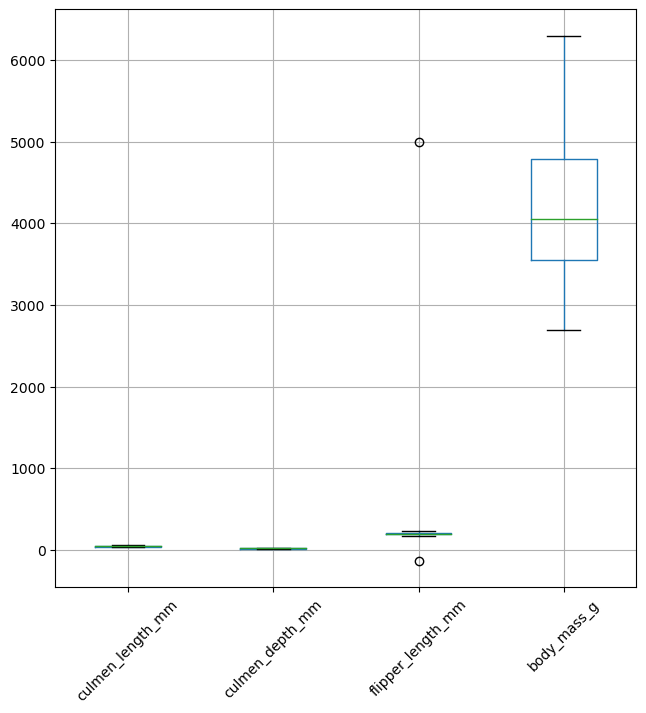

In [108]:
datos_1.boxplot()
plt.xticks(rotation=45)
plt.show()

In [109]:
datos_2= pd.get_dummies(datos_1).drop('sex_.',axis=1)
datos_2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False
340,46.8,14.3,215.0,4850.0,True,False
341,50.4,15.7,222.0,5750.0,False,True
342,45.2,14.8,212.0,5200.0,True,False


In [110]:

indice_max = datos_2['flipper_length_mm'].idxmax()

# Eliminar la fila con el valor máximo
datos_2.drop(indice_max,inplace=True)
indice_max

9

In [ ]:
datos_2

In [112]:
indice_min = datos_2['flipper_length_mm'].idxmin()
datos_2.drop(indice_min,inplace=True)
indice_min

14

In [114]:
datos_2.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [115]:
datos_final = datos_2.reset_index(drop=True)

In [ ]:
datos_final

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(datos_final)
datos_escalados= pd.DataFrame(data=X,columns=datos_2.columns)
datos_escalados

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(datos_escalados)
penguins_PCA = pca.fit_transform(datos_escalados)
varianza= dfx_pca.explained_variance_ratio_

penguins_PCA

array([[-7.29520694e-01, -2.09719199e+00, -6.44094949e-01,
        -5.68975392e-01,  3.46761908e-01,  5.44980602e-03],
       [-1.92930440e+00,  4.12149703e-01, -7.50700595e-02,
         1.40372796e-01,  4.70330710e-01,  1.67029352e-03],
       [-1.95352479e+00,  3.08485398e-01,  2.98653932e-01,
         3.14095040e-01, -4.31657849e-01, -7.02807152e-03],
       ...,
       [ 3.08574341e+00,  3.99018042e-01, -2.50663312e-01,
         9.80933259e-02,  2.33586550e-01, -8.87855664e-03],
       [ 5.12526787e-01,  2.21849104e+00, -2.17359938e-01,
         4.32690281e-01,  4.74068873e-01, -7.89440247e-03],
       [ 2.48379253e+00, -1.31616130e-02, -9.65855066e-02,
        -1.73183012e-01,  3.81382917e-01, -3.41432404e-03]])

In [118]:
pca.components_

array([[ 0.43467409, -0.15776641,  0.48020239,  0.50924062, -0.38595413,
         0.38378023],
       [ 0.09408742, -0.61211564,  0.30756805,  0.1860741 ,  0.49216838,
        -0.49498546],
       [ 0.86130767,  0.316695  , -0.0696824 , -0.28467284,  0.19244649,
        -0.18687819],
       [-0.20765188,  0.70719365,  0.40647707,  0.40027919,  0.25211016,
        -0.26029072],
       [ 0.1311858 ,  0.00194049, -0.71035108,  0.68174923,  0.08891383,
        -0.07416321],
       [ 0.00510559, -0.00136187, -0.01138655,  0.00252128, -0.70732513,
        -0.7067724 ]])

In [119]:
varianza_acumulada=np.cumsum(varianza)
varianza_acumulada

array([0.51973484, 0.86397525, 0.94989388, 0.98214815, 0.99900864,
       1.        ])

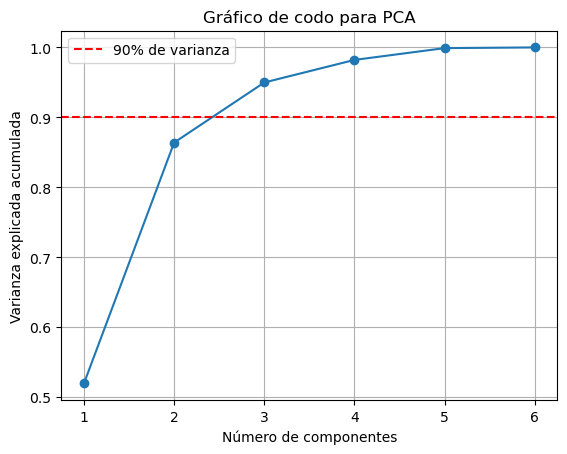

In [120]:
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% de varianza')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico de codo para PCA')
plt.grid(True)
plt.legend()
plt.show()

In [121]:
pca.components_[:,0]

array([ 0.43467409,  0.09408742,  0.86130767, -0.20765188,  0.1311858 ,
        0.00510559])

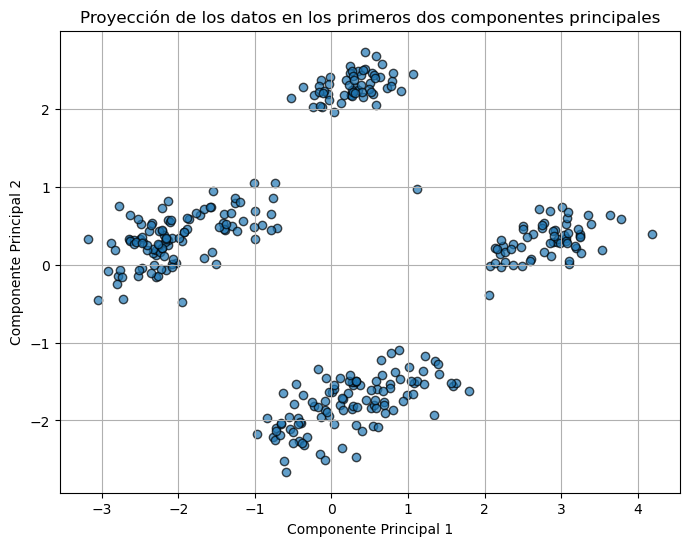

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], alpha=0.7, edgecolor='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de los datos en los primeros dos componentes principales')
plt.grid(True)
plt.show()

In [ ]:
penguins_PCA

In [123]:
import plotly.express as px
df_pca = pd.DataFrame(penguins_PCA[:, :4], columns=['PC1', 'PC2', 'PC3','PC4'])

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    opacity=0.7,
                    title='PCA con 3 Componentes Principales')
df_pca



,PC1,PC2,PC3,PC4
0,-0.729521,-2.097192,-0.644095,-0.568975
1,-1.929304,0.412150,-0.075070,0.140373
2,-1.953525,0.308485,0.298654,0.314095
3,-2.288178,-0.158278,-0.122059,0.963123
4,-0.621822,-2.514020,-0.314133,0.321506
...,...,...,...,...
328,0.655653,2.577632,0.008759,-0.120214
329,0.562064,2.387538,0.064089,0.103683
330,3.085743,0.399018,-0.250663,0.098093
331,0.512527,2.218491,-0.217360,0.432690


In [124]:
# Filtro
from gtda.mapper.filter import Projection

# Cobertura
from gtda.mapper.cover import CubicalCover

# Clustering
from sklearn.cluster import DBSCAN
# O si quieres el de giotto
from gtda.mapper.cluster import FirstSimpleGap




In [125]:
df_pca_2_dim = df_pca.iloc[:,:2]
df_pca_2_dim

,PC1,PC2
0,-0.729521,-2.097192
1,-1.929304,0.412150
2,-1.953525,0.308485
3,-2.288178,-0.158278
4,-0.621822,-2.514020
...,...,...
328,0.655653,2.577632
329,0.562064,2.387538
330,3.085743,0.399018
331,0.512527,2.218491


In [308]:
# Define filter function 
filter_func = Projection(columns=[0,1])
# Define cover
cover = CubicalCover(n_intervals=8, overlap_frac=0.1)
# Choose clustering algorithm
clustering = DBSCAN(eps=0.5, min_samples=8)


In [309]:

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clustering,
    verbose=False,
)
fig = plot_static_mapper_graph(pipe, penguins_PCA,)
fig.show(config={'scrollZoom': False})

In [310]:
fig = plot_static_mapper_graph(pipe,data=penguins_PCA, color_data=datos_final)

#fig.update_layout(showlegend=False)

fig.show(config={'scrollZoom': True})